In [2]:
import myfitnesspal
import datetime
import pandas as pd
import collections
from typing import Dict, List

In [3]:
client = myfitnesspal.Client('bradtferguson', password='Iluvet@k4ev')

In [4]:
day = client.get_date(2021, 9, 9)


In [5]:
day

<09/09/21 {'calories': 2178.0, 'carbohydrates': 277.0, 'fat': 54.0, 'protein': 167.0, 'sodium': 2404.0, 'sugar': 135.0}>

In [6]:
day.exercises[1].get_as_list()

[]

In [7]:
day.exercises[1].get_as_list()[0]['nutrition_information']

IndexError: list index out of range

In [ ]:
day.totals

In [ ]:
Jan2021 = datetime.date(2021, 1, 1)

# Rolling 7-day average of weight

In [8]:
start_date = datetime.date(2021, 7, 1)

In [9]:
def get_measurements(measurement: str='Weight', start_year:int=2021, start_month:int=1, start_day:int=1):
    start_date = datetime.date(start_year, start_month, start_day)
    measure_dict = client.get_measurements(measurement, start_date)
    measurements = []
    for key, value in measure_dict.items():
        measurement = pd.DataFrame({
            'date': [key],
            'measurement': [value]
        })
        measurements.append(measurement)
    df = pd.concat(measurements)
    df = df.sort_values(by='date', ascending=True)
    df['MA'] = df.iloc[:,1].rolling(window=7).mean()
    df = df.sort_values(by='date', ascending=False)
    
    return df

In [10]:
weight = get_measurements()
bodyfat = get_measurements('Body Fat %')

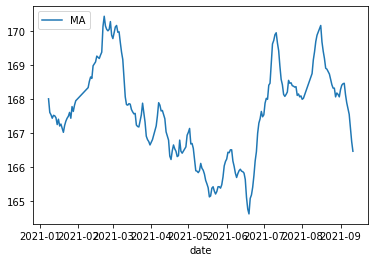

In [11]:
weight.plot(x='date', y='MA')

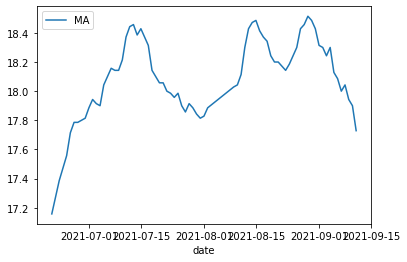

In [12]:
bodyfat.plot(x='date', y='MA')

In [13]:
# Rolling average of calories and macros

In [16]:
import csv, sys, os
from datetime import datetime

# Get account info
client = myfitnesspal.Client('bradtferguson', password='Iluvet@k4ev')# Set start year
startYear = "2021"
# Get limits
beginningDate = datetime.strptime(startYear, "%Y").date()
beginningYear = beginningDate.year
daysInMonth = {1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}
emptyNutrition = [None, None, None, None, None, None]

In [17]:
beginningYear

2021

In [1]:
print("")
print("################################################")
print("# Scraping MyFitnessPal                        #")
print("# Make sure your account is set to public      #")
print("# and your username and pass are in keychain   #")
print("################################################")
print("")

today = datetime.now().date()
currentYear = today.year

print("")
print("################################################")
print("# Get nutrition and weight information         #")
print("################################################")
print("")


################################################
# Scraping MyFitnessPal                        #
# Make sure your account is set to public      #
# and your username and pass are in keychain   #
################################################



NameError: name 'datetime' is not defined

In [19]:
for yearIndex in range(beginningYear, currentYear+1):
    
    # Create a file name based on this year's data
    thisFileName = "healthData_%s.csv" % yearIndex

    # Open CSV as read and write.
    # If file exists, open for read / write
    #   else, create file, write only.
    try:
        f = open(thisFileName, "r+")        # Check to see if file is complete,
        row_count = sum(1 for row in f)     # else, overwrite the file
        if(row_count != 366):               # A year of rows plus headers, and an empty line at end.
            f = open(thisFileName, "w+")
            row_count = 0
    except EnvironmentError:
        f = open(thisFileName, "w+")        # If file does not exist, create it.
        row_count = 0
    
    writer = csv.writer(f)
    
    # Check number of lines. If the year wasn't captured, start over.
    if(row_count < 365):
        # Write headers for totals
        writer.writerow(["Date","Calories", "Carbohydrates", "Fat", "Protein", "Sodium", "Sugar", "Weight", "Body Fat %"])
        sys.stdout.write(str(yearIndex)+": ")   # Print has a linefeed.
        sys.stdout.flush()
        for monthIndex in range(1, 12+1):
                
            beginningOfMonthStr = "%s-%s-%s" % (yearIndex, monthIndex, 1)
            endOfMonthStr = "%s-%s-%s" % (yearIndex, monthIndex, daysInMonth[monthIndex])

            beginningOfMonth = datetime.strptime(beginningOfMonthStr, "%Y-%m-%d").date()
            endOfMonth = datetime.strptime(endOfMonthStr, "%Y-%m-%d").date()
            
            thisMonthsWeights = dict(client.get_measurements('Weight', beginningOfMonth, endOfMonth))
            thisMonthsBodyfats = dict(client.get_measurements('Body Fat %', beginningOfMonth, endOfMonth))


            for dayIndex in range(1, daysInMonth[monthIndex]+1):
                
                fullDateIndex = "%s-%s-%s" % (yearIndex, monthIndex, dayIndex)
                thisDate = datetime.strptime(fullDateIndex, "%Y-%m-%d").date()
                if(thisDate > today):
                    break;

                thisDaysNutritionData = client.get_date(yearIndex, monthIndex, dayIndex)
                thisDaysNutritionDataDict = thisDaysNutritionData.totals
                thisDaysNutritionValues = thisDaysNutritionDataDict.values()

                thisDaysWeight = [(thisMonthsWeights.get(thisDate))]
                thisDaysBodyfat = [(thisMonthsBodyfats.get(thisDate))]
                
                if(len(thisDaysNutritionValues) < 6):
                    thisDaysNutritionValues = emptyNutrition
                print(fullDateIndex)

                dataRow = [fullDateIndex] + list(thisDaysNutritionValues) + thisDaysWeight + thisDaysBodyfat
                if dataRow:
                    writer.writerow(dataRow)

            sys.stdout.write("#")
            sys.stdout.flush()
        print(" -- Done.")
        f.close()
    else:
        print((str(yearIndex)+": Exists and is complete."))

2021: 2021-1-1
2021-1-2
2021-1-3
2021-1-4
2021-1-5
2021-1-6
2021-1-7
2021-1-8
2021-1-9
2021-1-10
2021-1-11
2021-1-12
2021-1-13
2021-1-14
2021-1-15
2021-1-16
2021-1-17
2021-1-18
2021-1-19
2021-1-20
2021-1-21
2021-1-22
2021-1-23
2021-1-24
2021-1-25
2021-1-26
2021-1-27
2021-1-28
2021-1-29
2021-1-30
2021-1-31
#2021-2-1
2021-2-2
2021-2-3
2021-2-4
2021-2-5
2021-2-6
2021-2-7
2021-2-8
2021-2-9
2021-2-10
2021-2-11
2021-2-12
2021-2-13
2021-2-14
2021-2-15
2021-2-16
2021-2-17
2021-2-18
2021-2-19
2021-2-20
2021-2-21
2021-2-22
2021-2-23
2021-2-24
2021-2-25
2021-2-26
2021-2-27
2021-2-28
#2021-3-1
2021-3-2
2021-3-3
2021-3-4
2021-3-5
2021-3-6
2021-3-7
2021-3-8
2021-3-9
2021-3-10
2021-3-11
2021-3-12
2021-3-13
2021-3-14
2021-3-15
2021-3-16
2021-3-17
2021-3-18
2021-3-19
2021-3-20
2021-3-21
2021-3-22
2021-3-23
2021-3-24
2021-3-25
2021-3-26
2021-3-27
2021-3-28
2021-3-29
2021-3-30
2021-3-31
#2021-4-1
2021-4-2
2021-4-3
2021-4-4
2021-4-5
2021-4-6
2021-4-7
2021-4-8
2021-4-9
2021-4-10
2021-4-11
2021-4-12
2021-4-

In [316]:
for yearIndex in range(beginningYear, currentYear+1):
    print(yearIndex)

2021


In [326]:
yearIndex=2021
monthIndex=6
dayIndex=25

In [327]:
thisDaysNutritionData = client.get_date(yearIndex, monthIndex, dayIndex)
thisDaysNutritionDataDict = thisDaysNutritionData.totals
thisDaysNutritionValues = thisDaysNutritionDataDict.values()

In [328]:
thisDaysNutritionData

<06/25/21 {'calories': 3572.0, 'carbohydrates': 415.0, 'fat': 137.0, 'protein': 155.0, 'sodium': 5273.0, 'sugar': 149.0}>

In [324]:
thisDaysNutritionValues

dict_values([3447.0, 361.0, 109.0, 186.0, 3594.0, 100.0])

In [302]:
thisDaysNutritionData = client.get_date(2021, 6, 26)

In [303]:
thisDaysNutritionData

<06/26/21 {'calories': 3447.0, 'carbohydrates': 361.0, 'fat': 109.0, 'protein': 186.0, 'sodium': 3594.0, 'sugar': 100.0}>

In [305]:
thisDaysNutritionDataDict = thisDaysNutritionData.totals
thisDaysNutritionValues = thisDaysNutritionDataDict.values()

In [306]:
thisDaysNutritionDataDict

{'calories': 3447.0,
 'carbohydrates': 361.0,
 'fat': 109.0,
 'protein': 186.0,
 'sodium': 3594.0,
 'sugar': 100.0}

In [307]:
thisDaysNutritionValues

dict_values([3447.0, 361.0, 109.0, 186.0, 3594.0, 100.0])

In [ ]:
writer.writerow(["Date","Calories", "Carbohydrates", "Fat", "Protein", "Sodium", "Sugar", "Weight", "Body Fat %"])


In [251]:
# Analyze the data

In [309]:
data = pd.read_csv('healthData_2021.csv')

In [310]:
for col in data.columns[1:]:
    data[f'{col}_MA'] = data.loc[:,col].rolling(window=7, min_periods=1).mean()

In [311]:
data['Calories']

0      1872.0
1         NaN
2      1024.0
3      1947.0
4      1847.0
        ...  
173       NaN
174    3242.0
175    3572.0
176    3447.0
177       NaN
Name: Calories, Length: 178, dtype: float64

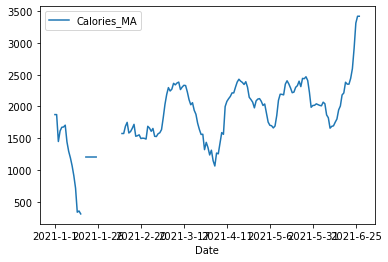

In [312]:
data.plot(x='Date', y='Calories_MA')

In [279]:
data['Weight_MA'] = data.loc[:,'Weight'].rolling(window=7).mean()
data['Weight_MA'] = data.loc[:,'Weight'].rolling(window=7).mean()

In [313]:
data.tail()

,Date,Calories,Carbohydrates,Fat,Protein,Sodium,Sugar,Weight,Body Fat %,Calories_MA,Carbohydrates_MA,Fat_MA,Protein_MA,Sodium_MA,Sugar_MA,Weight_MA,Body Fat %_MA
173,2021-6-23,NaN,NaN,NaN,NaN,NaN,NaN,167.1,18.0,2596.333333,229.333333,113.333333,170.000000,3613.333333,90.666667,165.757143,17.385714
174,2021-6-24,3242.0,325.0,121.0,218.0,5824.0,116.0,166.6,17.8,2917.666667,272.333333,121.666667,183.666667,4391.000000,104.000000,166.185714,17.471429
175,2021-6-25,3572.0,415.0,137.0,155.0,5273.0,149.0,166.1,17.8,3313.000000,347.000000,135.333333,167.666667,5048.000000,132.666667,166.457143,17.557143
176,2021-6-26,3447.0,361.0,109.0,186.0,3594.0,100.0,168.4,17.9,3420.333333,367.000000,122.333333,186.333333,4897.000000,121.666667,167.000000,17.714286
177,2021-6-27,NaN,NaN,NaN,NaN,NaN,NaN,169.2,17.7,3420.333333,367.000000,122.333333,186.333333,4897.000000,121.666667,167.300000,17.785714


In [265]:
data.iloc[::-1]

,Date,Sodium,Carbohydrates,Calories,Fat,Sugar,Protein,Weight,Body Fat %
177,2021-6-27,NaN,NaN,NaN,NaN,NaN,NaN,169.2,17.7
176,2021-6-26,3447.0,361.0,109.0,186.0,3594.0,100.0,168.4,17.9
175,2021-6-25,3572.0,415.0,137.0,155.0,5273.0,149.0,166.1,17.8
174,2021-6-24,3242.0,325.0,121.0,218.0,5824.0,116.0,166.6,17.8
173,2021-6-23,NaN,NaN,NaN,NaN,NaN,NaN,167.1,18.0
...,...,...,...,...,...,...,...,...,...
4,2021-1-5,1847.0,229.0,48.0,168.0,4946.0,93.0,166.3,NaN
3,2021-1-4,1947.0,179.0,66.0,205.0,3097.0,72.0,167.1,NaN
2,2021-1-3,1024.0,63.0,44.0,97.0,1063.0,36.0,168.9,NaN
1,2021-1-2,NaN,NaN,NaN,NaN,NaN,NaN,169.1,NaN
